<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">3. Image processing - Round 2</p>

### Hecho por: Lara Ocón y Lucía Prado

### En esta práctica, pondremos en práctica conceptos aprendidos durante la clase teórica. Empezaremos por detectar corners en una imagen a partir del método Harris

### Tal como hemos estudiado, Harris propone detecta esquinas en imágenes a partir del análisis de la distribución de sus derivadas en X y en Y. 

### La matriz de Harris, R, se calcula a partir de:

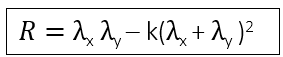

### Si sustituimos el valor de lambda-x y lambda-y por el valor de la imagen de entrada convolucionada con un filtro derivativo en X y en Y vemos que llegamos a una expresión similar

### El método Harris propone un  método basado en el análisis de diferencia de intensidades para detectar esquinas. Tal como explica la documentación de opencv sobre el método (https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html), la expresión anterior es análoga a
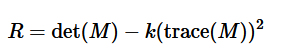

### donde M es
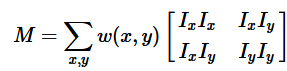

### Es decir, si movemos un "sliding window" por la imagen de entrada y calculamos el valor de M, podemos aplicar la fórmula de Harris para detectar esquinas

### Apliquemos de manera manual el método Harris a la detección de esquinas de la imagen 0. Primero, convierte tu imagen a escala de grises y aplica un filtro Sobel en X y en Y. Para ello, deberás primero filtrar el ruido con un filtro gaussiano. Usa las funciones de opencv para esto: cv2.GaussianBlur y cv2. Sobel


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Implementa aquí tu código
img = cv2.imread('images/0.jpg')
# convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# filtramos ruido con filtro gaussiano
blur = cv2.GaussianBlur(gray,(5,5),0)

# aplicar filtro sobel en X e Y
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5)

### Calcula el valor de IxIx, IyIy e Ixy de la fórmula de Harris. Después, calcula el valor de la matriz R para cada window

In [2]:
# Implementa aquí tu código
window_size = 5
height, width = img.shape[:2]
dx2 = sobelx**2
dy2 = sobely**2
dxy = sobelx*sobely
matrix_R = np.zeros((height, width))
k = 0.04

offset = int( window_size / 2 )

print ("Finding Corners...")
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

        #   H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
        H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

        #   R=det(H)-k(Trace(H))^2 )
        # Implementa aquí tu código para calcular R
        R  = np.linalg.det(H) - k*(np.trace(H)**2)
        matrix_R[y-offset, x-offset]=R

print(matrix_R)


Finding Corners...
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### A continuación se normaliza el valor de R. Muestra los vértices calculados sobre la imagen de entrada

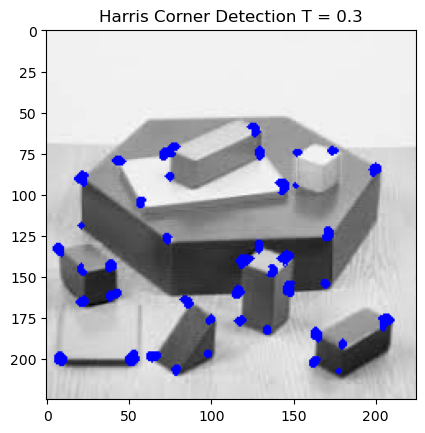

In [3]:
threshold = 0.3

cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        value=matrix_R[y, x]
        if value>threshold:
            # Implementa aquí tu código, pero pintamos los circulos mucho mas pequeños
            cv2.circle(img, (x, y), 1, (0, 0, 255), 1)
                
# Implementa aquí tu código para visualizar los resultados
plt.imshow(img)
plt.title(f'Harris Corner Detection T = {threshold}')
plt.show()



### Compara el resultado obtenido con el que consigues al aplicar la función cv2.cornerHarris a la imagen de entrada. Juega con sus parámetros apra que el resultado sea el más preciso

Best parameters: window_size=5, kernel_size=7, threshold=0.07


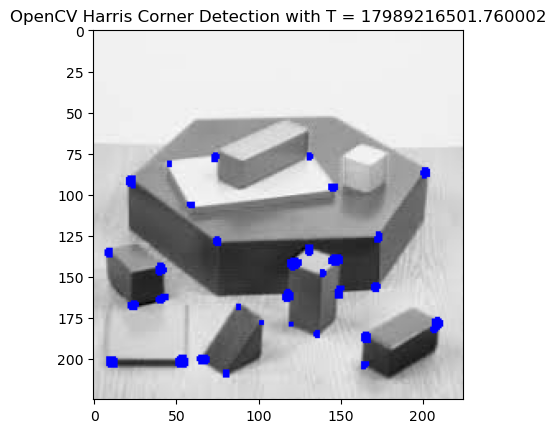

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Implementa aquí tu código

# comparamos nuestra deteccion de corners con la implementacion de OpenCV

img = cv2.imread('images/0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray) # la convertimos a float32 ya que cv2.cornerHarris lo requiere

# Implementa aquí tu código
windows = [3,5,7,9,11,13,15,17,19,21]
kernels = [3,5,7,9,11,13,15,17,19,21]
k = 0.04
t = [0.01,0.02,0.03,0.04,0.05,0.06,0.07, 0.1, 0.2, 0.3, 0.4, 0.5] # 

# number corners detected
n = []
for window in windows:
    for kernel in kernels:
        for threshold in t:
            dst = cv2.cornerHarris(gray,window,kernel,k) # k es el parametro libre de la ecuacion, es 
            dst = cv2.dilate(dst,None) # dilatamos los corners para que se vean mejor
            img[dst>threshold*dst.max()]=[0,0,255]
            # contamos el numero de corners detectados
            n.append(np.sum(dst>threshold*dst.max()))

# cogemos el mejor resultado, el mas cerca de 1000
best = np.argmin(np.abs(np.array(n)-1000))
index = np.unravel_index(best, (len(windows), len(kernels), len(t)))

# veamos como queda con los mejores parametros
img = cv2.imread('images/0.jpg')
window_size = windows[index[0]]
kernel_size = kernels[index[1]]
threshold = t[index[2]]
print(f'Best parameters: window_size={window_size}, kernel_size={kernel_size}, threshold={threshold}')
dst = cv2.cornerHarris(gray,window_size,kernel_size,k)
dst = cv2.dilate(dst,None)
img[dst>threshold*dst.max()]=[0,0,255] # multiplicamos el threshold por el valor maximo de dst para que sea un valor absoluto

# Implementa aquí tu código para visualizar los resultados
plt.imshow(img)
plt.title(f'OpenCV Harris Corner Detection with T = {threshold}')
plt.show()




### Aplicación del método Hough. Usa la función HoughLinesP de opencv para convertir tus edges en boundaries. Aplica el filtro de canny a la imagen original (ver opencv-canny) y después aplica Hough para conseguir ver las lineas en la imagen "hough-ex.jpg"

### Primero, lee la imagen y conviértela a RGB

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Implementa aquí tu código
# aplicamos la funcion houghlinesP para convertir los edges en boundaries
image = cv2.imread('images/hough-ex.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


### A continuación, aplica un filtro canny para detectar bordes usando la función cv2.Canny. 

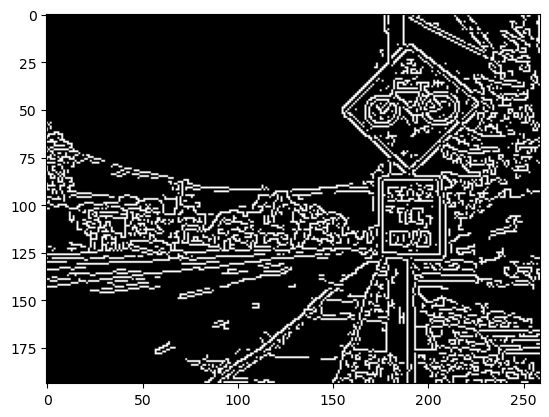

In [6]:
low_threshold = 50
high_threshold = 100

# Una vez hemos pasado la imagen a rgb aplicamos canny
edges = cv2.Canny(image,low_threshold,high_threshold,apertureSize = 3)

# visualizamos los edges
plt.imshow(edges,cmap='gray')



### utiliza la función cv2.HoughLinesP para encontrar los boundaries de tus bordes (lineas rectas). Juega con los parámetros 
### propuestos en el ejercicio para encontrar el mayor número de lineas rectas en la imagen que correspondan con la realidad

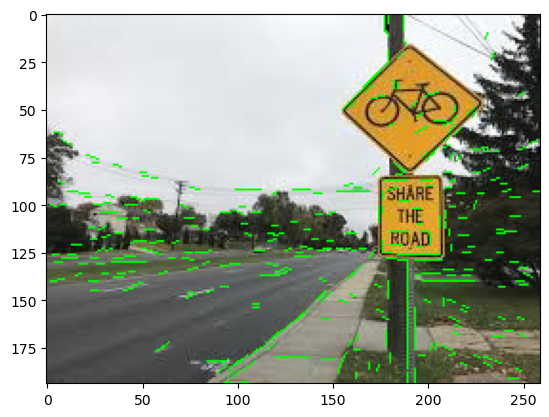

In [7]:
rho = 1
theta = np.pi/180
threshold = 30
min_line_length = 200
max_line_gap = 3
line_image = np.copy(image) #creating an image copy to draw lines on# Run Hough on the edge-detected image

# Implementa aquí tu código para llamar a HoughLinesP
lines = cv2.HoughLinesP(edges,rho,theta,threshold,min_line_length,max_line_gap)



# Implementa aquí tu código para visualizar las líneas calculadas
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),1)

plt.imshow(line_image)

### SIFT DETECTOR

### en la siguiente parte de la práctica calcularemos blobs relevante para la imagen "hough.ex.jpg". Primero usaremos la función "blob_log" y "blob_dog" del paquete skimage para detectar blobs en la imagen de entrada por "difference of gaussians" y por "laplacian of gaussian".

### aplica las funcionas blob_log y blob_dog y muestra los blobs encontrados en cada caso demostrando que son similares. ¿Qué diferencia había entre la "laplacian of gaussian" y la "difference of gaussian"? ¿Se pueden usar de manera indistinta para encontrar blobs? Razona tu respuesta en el informe

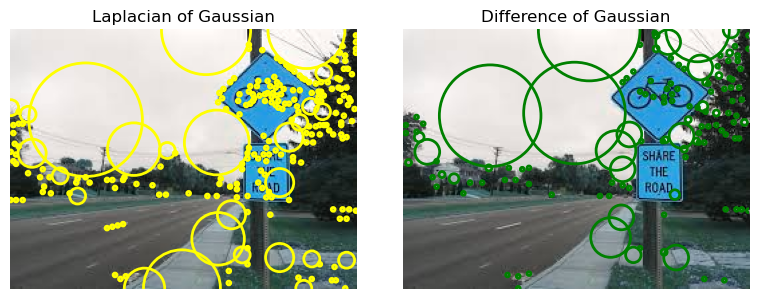

In [8]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
 
import matplotlib.pyplot as plt
 
image=cv2.imread('images/hough-ex.jpg')
#image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)
# aplicar la función de detección de blobs a la imagen en escala de grises blob_log
blobs_log = blob_log(image_gray, max_sigma=30, threshold=0.1)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
 
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
 
 
 
blobs_list = [blobs_log, blobs_dog]
# Implementa aquí tu código para visualizar los blobs calculados usando LoG y DoG

# Dibuja los blobs detectados en la imagen original
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box'})
ax = axes.ravel()
ax[0].set_title('Laplacian of Gaussian')
ax[0].imshow(image)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    ax[0].add_patch(c)
ax[0].set_axis_off()
ax[1].set_title('Difference of Gaussian')
ax[1].imshow(image)
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='green', linewidth=2, fill=False)
    ax[1].add_patch(c)
ax[1].set_axis_off()
plt.tight_layout()
plt.show()

### En este último ejercicio, aplicaremos el método SIFT para encontrar important points y sus descriptores en dos imágenes consecutivas para hacer su stitching. Deberás instalar el paquete pandas

In [9]:
# pip install pandas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Lee las imágenes car0 y car1 y almacénalas en la variable "left" y "right". Tras leerlas, deberás aplicar un resize a la dimensión 1024,768 aplicando la flag cv2.INTER_AREA

In [10]:
dim=(1024,768)
left = cv2.imread('images/car0.jpg')
right = cv2.imread('images/car1.jpg')
left=cv2.resize(left,dim,interpolation=cv2.INTER_AREA)
right=cv2.resize(right,dim,interpolation=cv2.INTER_AREA)

### Aplica la función sift.detectAndCompute de python aplicada sobre la imagen car0 y car1 de nuestro dataset para encontrar los keypoints en ellas según el método SIFT


### Una vez encontrados los keypoints y los descriptores tendremos que hacer el "matching" entre ellos. Para ellos aplicaremos la comparativa de distancias entre candidatos a "matched features" propuesto por R.Lowe.

### Este método dice que, por cada keypoint de la imagen 1 tendré candidatos a "best match" (mismo keypoint en imagen 2) en la siguiente imagen. En este ejercicio, guardamos en la variable "matches" listas del análisis entre descriptores de ambas imágenes
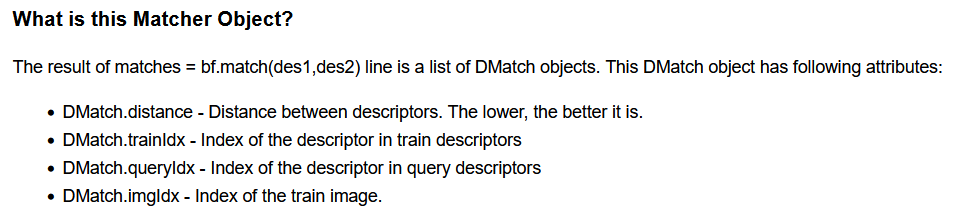

### Revisa la documentación aquí: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

### Implementa el "ratio test" de Lowe para quedarte con los mejores matches o coincidencias entre keypoints. Este test dice: si la distancia entre el keypoint A de la imagen 1 y su mejor candidato a keypoint correspondiente en la imagen 2 es MENOR que el 75% de la distancia entre A y el segundo mejor candidato, entonces el keypoint A y su mejor candidato es una pareja de matches

In [11]:
# Inicializar el detector SIFT
sift = cv2.SIFT_create()
 
# Encontrar keypoints y descriptores para la imagen car0
lKeypoints, lDescriptors = sift.detectAndCompute(left, None)
# Encontrar keypoints y descriptores para la imagen car1
rKeypoints, rDescriptors = sift.detectAndCompute(right, None)

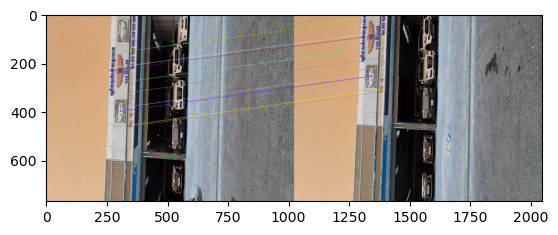

(<matplotlib.image.AxesImage at 0x7f84f8d83d00>, None)

In [12]:
bf = cv2.BFMatcher()
 
# Realiza la comparación de descriptores
matches = bf.match(lDescriptors, rDescriptors)
 
# Ordena los matches por distancia (menor distancia es mejor)
matches = sorted(matches, key=lambda x: x.distance)
img3 = cv2.drawMatches(left,lKeypoints,right,rKeypoints,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

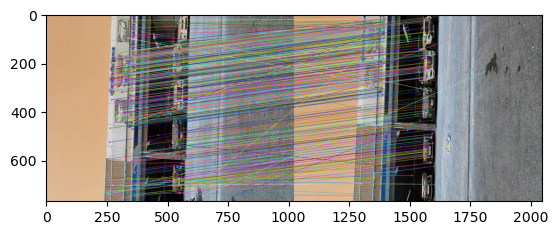

(<matplotlib.image.AxesImage at 0x7f84f8e64280>, None)

In [13]:
matches = bf.knnMatch(lDescriptors, rDescriptors,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(left,lKeypoints,right,rKeypoints,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [14]:
def stitching(img1, img2, min_match_count = 10):
    sift = cv2.SIFT_create()
    
    
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)
    
    
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    
    
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    
    
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)
    
   
    # Implementa aquí tu código para calcular tus "good matches"
    good_matches = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good_matches.append(m)
            
    if len(good_matches) > min_match_count:
        src_pts = np.float32([ keypoints1[good_match.queryIdx].pt
                              for good_match in good_matches ]).reshape(-1,1,2)
        
        dst_pts = np.float32([ keypoints2[good_match.trainIdx].pt 
                              for good_match in good_matches ]).reshape(-1,1,2)
        
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        result = warpImages(img2, img1, M)
        return result
    
    else:
        print ("We don't have enough number of matches between the two images.")
        print ("Found only " + str(len(good_matches)) + " matches.")
        print ("We need at least " + str(min_match_count) + " matches.")
        


### las siguientes funciones son de ayuda. No hay que implementarlas

In [15]:
def showplt(image, title=None, pltnative=False):
    if pltnative: 
        plt.imshow(image)
    else: 
        plt.imshow(image[...,::-1])
    plt.title(title)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    
def warpImages(img1, img2, H):
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]
    
    list_of_points_1 = np.float32([
        [0,0], 
        [0,rows1],
        [cols1,rows1], 
        [cols1,0]
    ])
    list_of_points_1 = list_of_points_1.reshape(-1,1,2)

    temp_points = np.float32([
        [0,0], 
        [0,rows2], 
        [cols2,rows2],
        [cols2,0]
    ])
    temp_points = temp_points.reshape(-1,1,2)
    
    list_of_points_2 = cv2.perspectiveTransform(temp_points, H)
    
    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)
    
    ##Define boundaries:
    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
    
    translation_dist = [-x_min,-y_min]
    
    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0,0,1]])
    
    output_img = cv2.warpPerspective(img2, 
                                     H_translation.dot(H), 
                                     (x_max - x_min, y_max - y_min))
    ## Paste the image:
    output_img[translation_dist[1]:rows1+translation_dist[1], 
               translation_dist[0]:cols1+translation_dist[0]] = img1
    
    return output_img
#

### Llama a la función "warp" para hacer el stitching. Rota la imagen de salida para que se vea recta

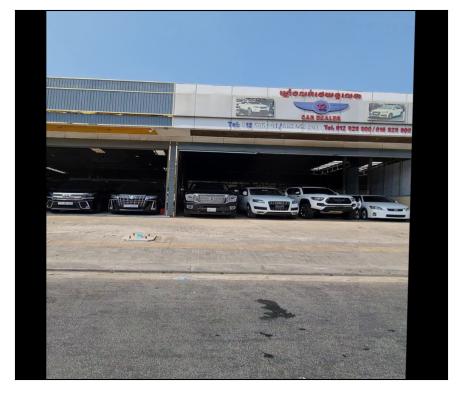

In [16]:

stitch_image = stitching(left,right)
 
alto, ancho = stitch_image.shape[:2]
centro = (ancho // 2, alto // 2)
matriz_rotacion = cv2.getRotationMatrix2D(centro, 270, 1.0)
imagen_rotada = cv2.warpAffine(stitch_image, matriz_rotacion, (ancho, alto))
showplt(imagen_rotada)